Este archivo se encarga de representar los datos y ver posibles valores atípicos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_ph = pd.read_csv('pH Data.csv')
df_ph_sh = df_ph.sample(frac=1, random_state=7).reset_index(drop=True)

display(df_ph.head(5))
print(df_ph.info())
print(df_ph.describe())

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB
None
             blue       green         red       label
count  653.000000  653.000000  653.000000  653.000000
mean    89.290965  130.094946  120.655436    7.055130
std     74.974850   72.487085   89.581264    4.287951
min      0.000000    0.000000    0.000000    0.000000
25%     22.000000   68.000000   52.000000    3.000000
50%     67.000000  146.000000   90.000000    7.000000
75%    162.000000  189.000000  224.000000   11.000000
max    255.000000  255.000000  255.000000   14.000000


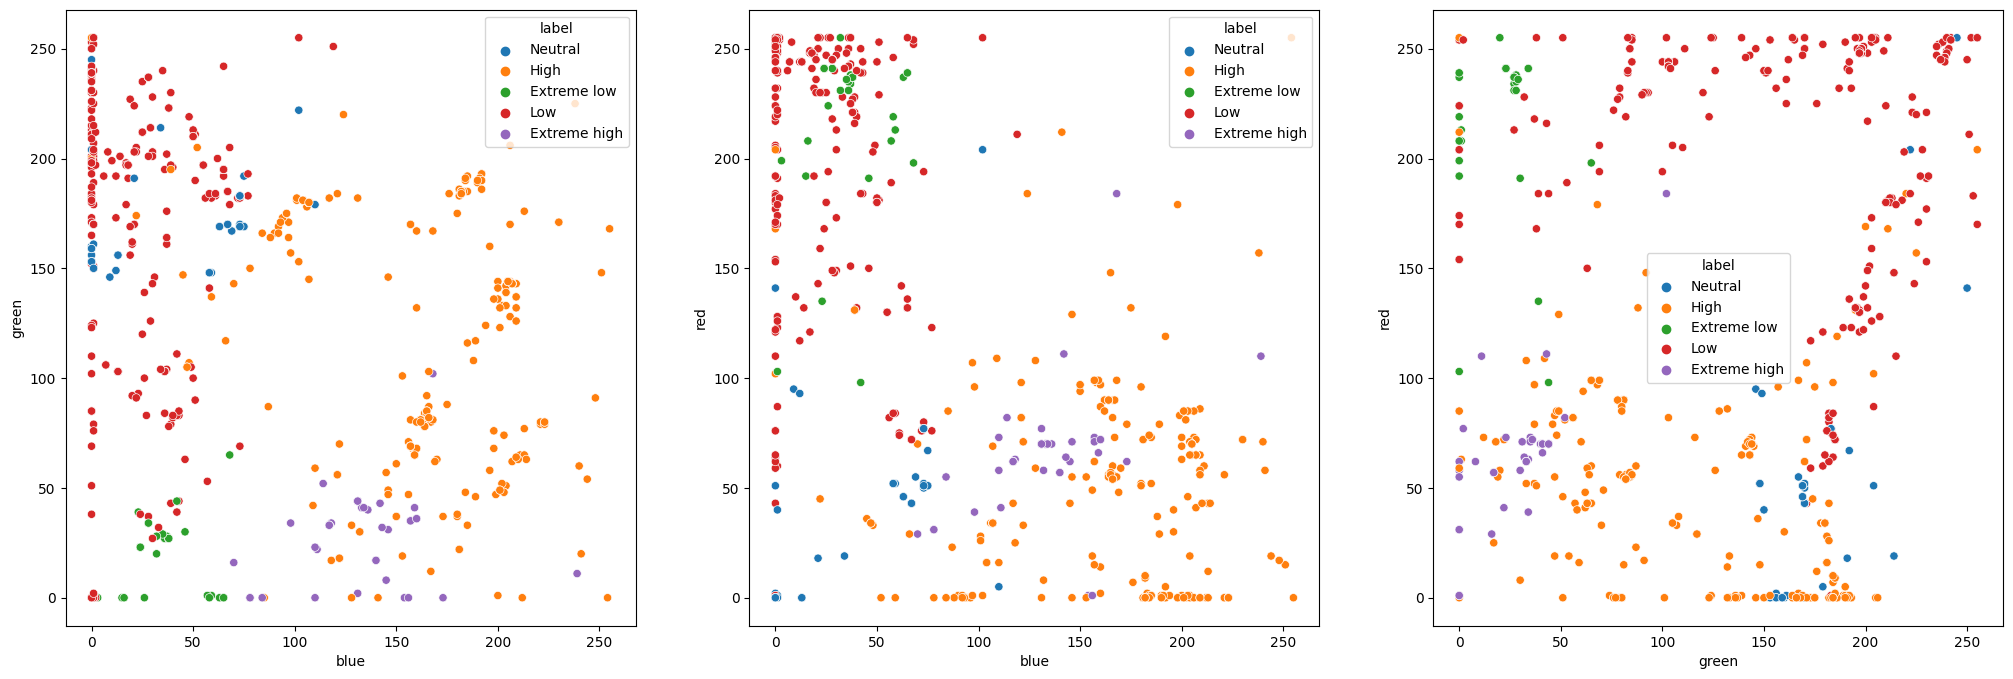

In [3]:
df_ph_shg = df_ph_sh.copy()
ph_order = ['Extreme low', 'Low', 'Neutral', 'High', 'Extreme high']

for i in range(df_ph_shg.shape[0]):

  if df_ph_shg['label'][i] == 0:
    df_ph_shg['label'][i] = 'Extreme low'

  elif df_ph_shg['label'][i] == 14:
    df_ph_shg['label'][i] = 'Extreme high'

  elif df_ph_shg['label'][i] < 7:
    df_ph_shg['label'][i] = 'Low'

  elif df_ph_shg['label'][i] == 7:
    df_ph_shg['label'][i] = 'Neutral'

  else:
    df_ph_shg['label'][i] = 'High'

fig, ax = plt.subplots(1,3,figsize=(25,8))
sns.scatterplot(x='blue', y='green', data=df_ph_shg, hue='label', legend='full', ax=ax[0])
sns.scatterplot(x='blue', y='red', data=df_ph_shg, hue='label', legend='full', ax=ax[1])
sns.scatterplot(x='green', y='red', data=df_ph_shg, hue='label',  legend='full', ax=ax[2])
plt.show()

A continuación, se desea observar solo aquellos datos que tienen un pH neutro:

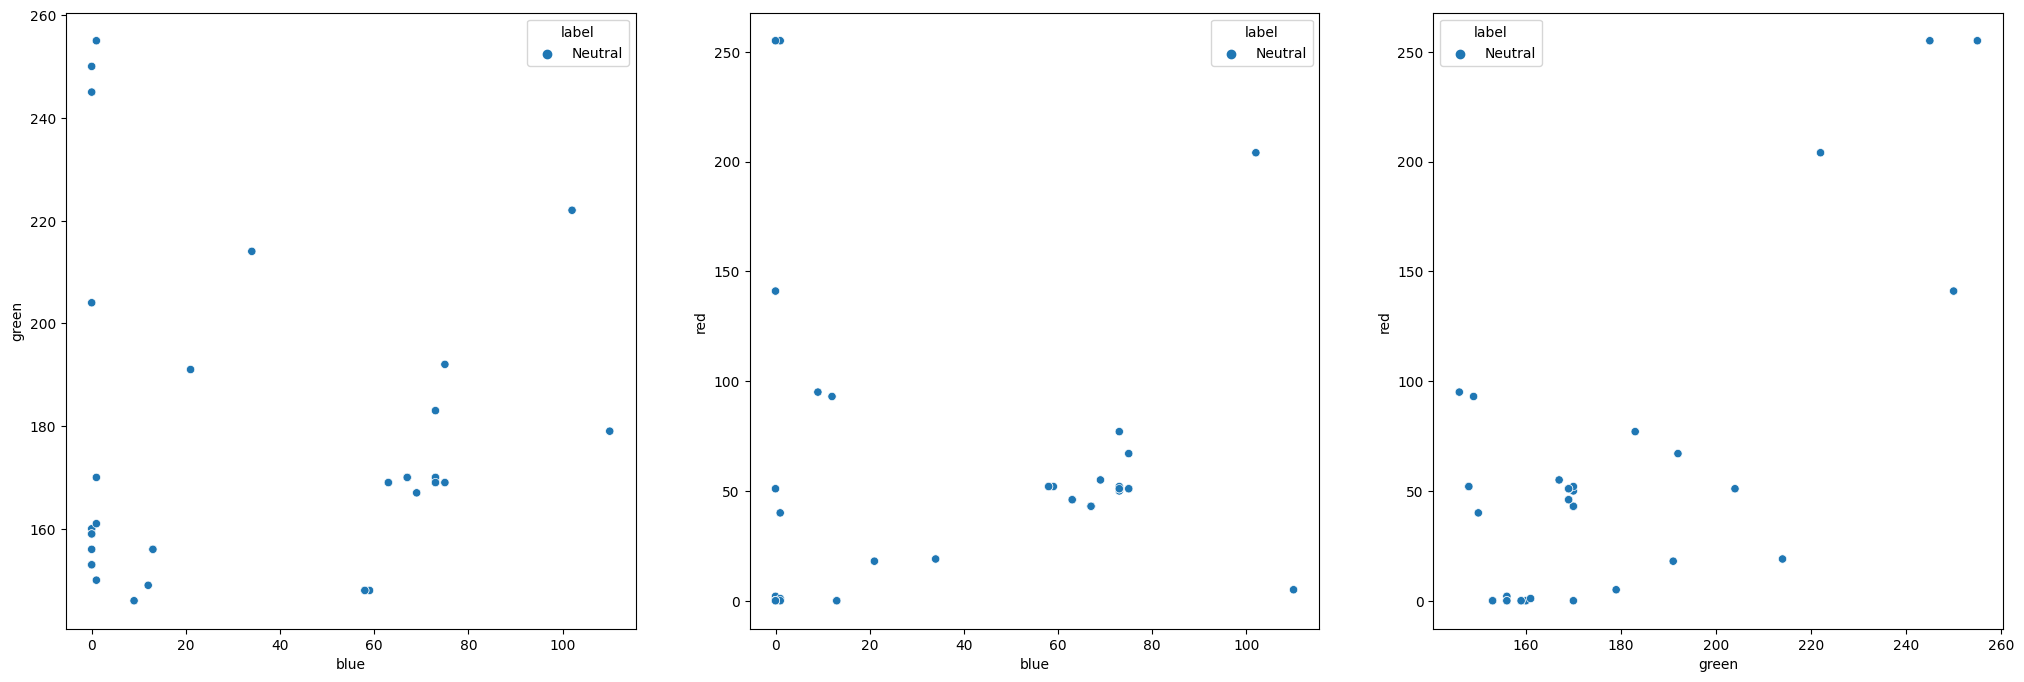

In [4]:
neutral = df_ph_shg[df_ph_shg['label'] == 'Neutral']
fig, ax = plt.subplots(1,3,figsize=(25,8))
sns.scatterplot(x='blue', y='green', data=neutral, hue='label', legend='full', ax=ax[0])
sns.scatterplot(x='blue', y='red', data=neutral, hue='label', legend='full', ax=ax[1])
sns.scatterplot(x='green', y='red', data=neutral, hue='label',  legend='full', ax=ax[2])
plt.show()

Con el siguiente analisis, se desea observar por grafico de cajas y bigotes, los valores normales para cada categoría de acidez

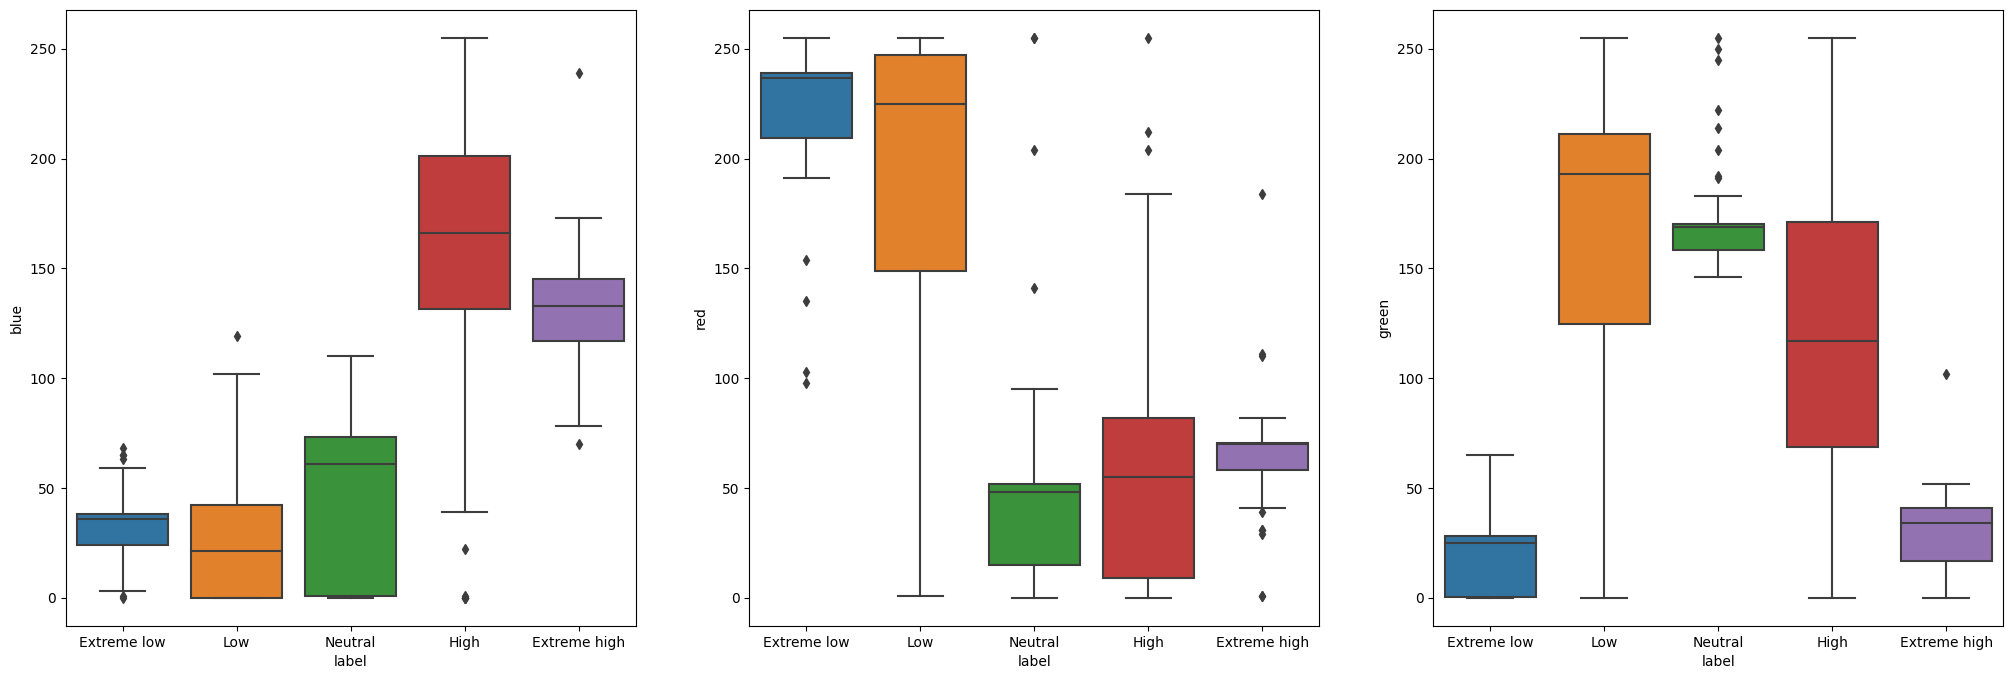

In [5]:
fig2, ax2 = plt.subplots(1,3,figsize=(25,8))
sns.boxplot(x='label', y='blue', data=df_ph_shg, order=ph_order, ax=ax2[0]) #this omittes ouliers
sns.boxplot(x='label', y='red', data=df_ph_shg, order=ph_order,ax=ax2[1])
sns.boxplot(x='label', y='green', data=df_ph_shg, order=ph_order,ax=ax2[2])
plt.show()